# 카테고리분포와 다항분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [10]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

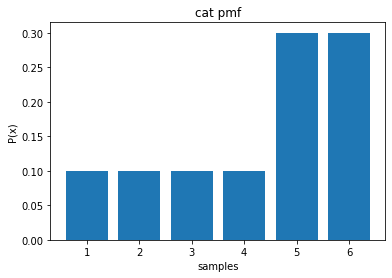

In [11]:
import pandas as pd

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("samples")
plt.title("cat pmf")
plt.show()

In [12]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

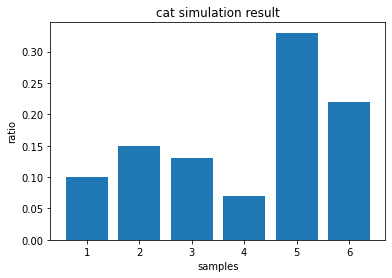

In [13]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("cat simulation result")
plt.xlabel("samples")
plt.ylabel("ratio")
plt.show()

In [14]:
df = pd.DataFrame({"t": rv.pmf(xx_ohe.values), "s": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["samples", "type", "ratio"]
df.pivot("samples", "type", "ratio")
df

,samples,type,ratio
0,1,t,0.10
1,1,s,0.10
2,2,t,0.10
3,2,s,0.15
4,3,t,0.10
5,3,s,0.13
6,4,t,0.10
7,4,s,0.07
8,5,t,0.30
9,5,s,0.33


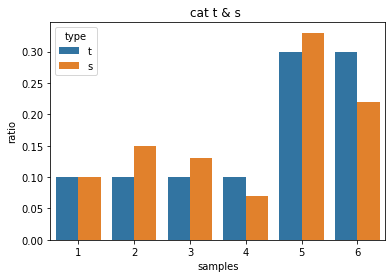

In [15]:
import seaborn as sns
sns.barplot(x="samples", y="ratio", hue="type", data=df)
plt.title("cat t & s ")
plt.show()

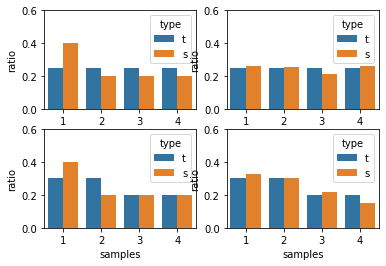

In [17]:
def plot_categorical(mu, N):
    rv = sp.stats.multinomial(1, mu)
    xx = np.arange(1, len(mu) + 1)
    xx_ohe = pd.get_dummies(xx)
    X = rv.rvs(N, random_state=0)
    y = X.sum(axis=0) / float(len(X))
    df = pd.DataFrame({'t':rv.pmf(xx_ohe.values), 's': y},
                      index=xx).stack()
    df = df.reset_index()
    df.columns = ['samples', 'type', 'ratio']
    df.pivot('samples', 'type', 'ratio')
    sns.barplot(x='samples', y='ratio', hue='type', data = df)
    plt.ylim(0, 0.6)
    
mu1 = [0.25, 0.25, 0.25, 0.25]
N1 = 10
mu2 = [0.3, 0.3, 0.2, 0.2]
N2 = 1000

plt.subplot(221)
plot_categorical(mu1, N1)

plt.subplot(222)
plot_categorical(mu1, N2)

plt.subplot(223)
plot_categorical(mu2, N1)

plt.subplot(224)
plot_categorical(mu2, N2)

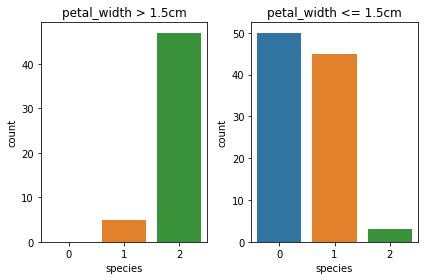

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x="species", data=df1, ax=ax[0]).set_title("petal_width > 1.5cm")
sns.countplot(x="species", data=df2, ax=ax[1]).set_title("petal_width <= 1.5cm")
plt.tight_layout()
plt.show()

In [20]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

np.random.seed(0)
X = rv.rvs(100)
X[:10]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

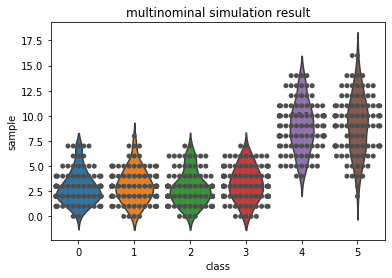

In [21]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "sample"]

sns.violinplot(x="class", y="sample", data=df, inner="quartile")
sns.swarmplot(x="class", y="sample", data=df, color=".3")
plt.title("multinominal simulation result")
plt.show()

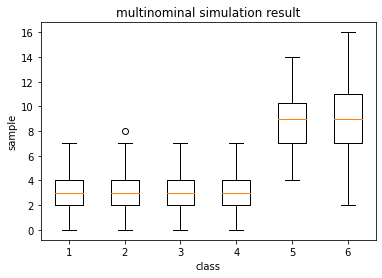

In [22]:
plt.boxplot(X)
plt.title("multinominal simulation result")
plt.xlabel("class")
plt.ylabel("sample")
plt.show()